### MEMO_0707 (v0707_1.0)

### _* Memo_0707_1_

In [1]:
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [2]:
## this code was run.
#!pip install keras-tuner
# import numpy as np
# import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
# print(f'Current Step #01 [now = {datetime.now()}')
from IPython.display import Markdown

from lib.analy_util import ( draw_markdown,
                             draw_graph,
                             draw_scatter,
                             get_pre_bef,
                             draw_average,
                             get_frequency,
                             get_information,
                             analyze_v1,
                             data_prepare,
                             search_model,
                             get_information_v2,
                             get_extdatas,
                             )
print(f'define this code. [{datetime.now()}]')


title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 30


define this code. [2025-07-22 18:38:03.933852]
define this code. [2025-07-22 18:38:03.934030]


In [3]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"

Markdown(contents)

row's len = 400


###### Updated 2025-07-22 18:38:03.940513

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1182|08,10,14,20,33,41|28|126|1|2|1|1|1|
|1181|08,10,14,20,33,41|28|126|1|2|1|1|1|
|1180|06,12,18,37,40,41|3|154|1|2|0|1|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
###### Updated 2025-07-22 18:38:03.950615

In [4]:
"""
data preparation
"""

#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

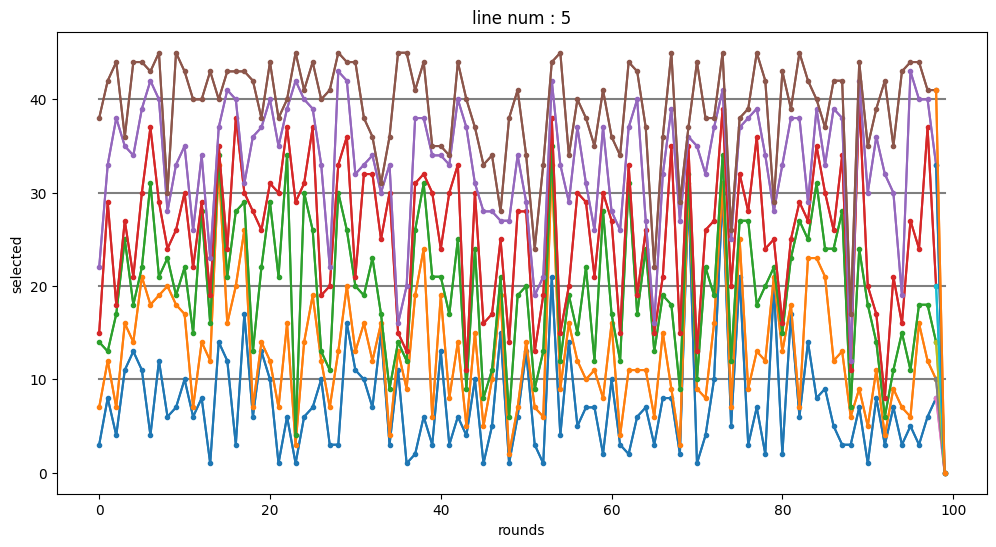

In [5]:
ext_datas = []

for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False
show_cnt = 100

start_pos = row_length - show_cnt

show_data = []
for i in range(6):
    show_data.append(row_list[i][start_pos:])

draw_scatter(show_data, f'line num : {key}',
             True,
             True,
             show_cols,
             ext_datas,
             show_label,
             helper_line_nums=[10, 20, 30, 40])


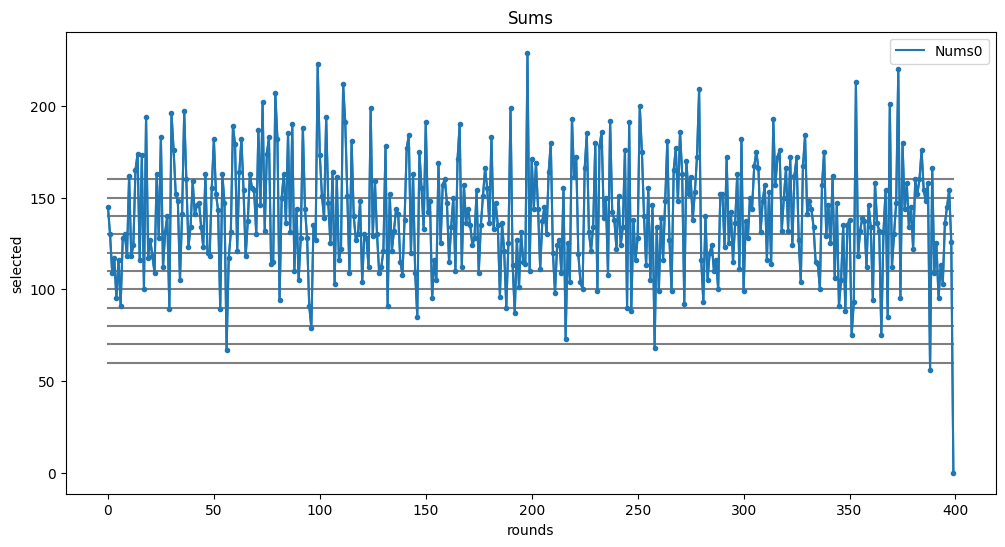

candidate =  0
candidate =  dict_values([0, 0, 0, 0, 0, 0])
last      =  [145, 130, 109, 117, 95, 116, 91, 128, 130, 118, 162, 118, 124, 165, 174, 116, 173, 100, 194, 117, 127, 118, 109, 163, 128, 183, 112, 131, 140, 89, 196, 176, 152, 148, 105, 141, 197, 160, 123, 134, 159, 141, 146, 147, 134, 123, 163, 120, 118, 155, 182, 152, 143, 89, 163, 147, 67, 117, 131, 189, 179, 121, 164, 182, 154, 118, 137, 163, 155, 154, 130, 187, 146, 202, 132, 174, 183, 114, 115, 207, 182, 94, 150, 163, 136, 185, 131, 190, 110, 144, 105, 128, 188, 144, 128, 91, 79, 135, 127, 223, 173, 151, 139, 194, 147, 125, 164, 103, 161, 116, 122, 212, 191, 151, 109, 181, 140, 127, 130, 148, 104, 130, 128, 112, 199, 129, 159, 130, 109, 112, 121, 178, 91, 152, 121, 132, 144, 141, 115, 108, 138, 177, 184, 120, 163, 109, 85, 175, 155, 133, 191, 142, 148, 95, 116, 105, 169, 125, 157, 160, 147, 115, 134, 150, 110, 171, 190, 112, 157, 136, 144, 135, 124, 128, 154, 109, 135, 151, 166, 155, 136, 183, 133, 147, 135, 96, 136, 121

In [6]:
s1 = sums[:-1] + [sum(candidate.values())]
draw_scatter([s1], f'Sums', helper_line_nums=[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
print('candidate = ', sum(candidate.values()))
print('candidate = ', candidate.values())
print('last      = ', sums[:-1])

In [7]:
print(candidate)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


before   = 0
ext_data = 8
after    = 0
ext_datas = [8, 0]


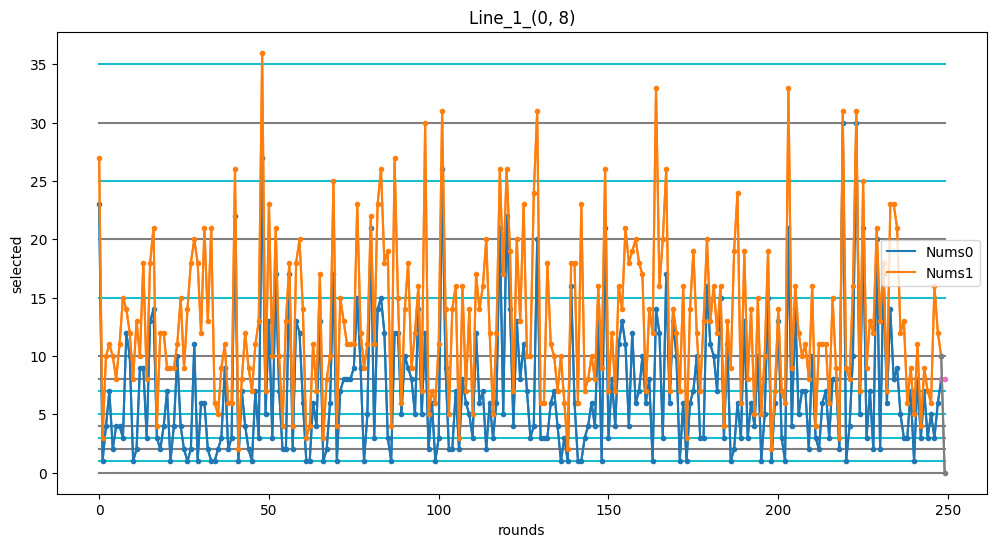

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
사용자 선택       = 8
마지막 값        = 8
마지막 값들       = [30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3, 6, 8]
자주 나오는 값(부분) = [(26, 1), (22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 9), (2, 10), (4, 10), (7, 13), (1, 14), (6, 18), (3, 25)]
자주 나오는 값(전체) = [(23, 1), (27, 1), (26, 1), (18, 2), (22, 2), (30, 2), (20, 3), (19, 4), (15, 5), (17, 7), (16, 7), (21, 7), (11, 9), (13, 13), (14, 14), (12, 16), (10, 16), (9, 16), (8, 20), (4, 27), (5, 27), (7, 27), (6, 32), (2, 43), (1, 46), (3, 51)]
마지막 수의 앞과 뒤  = [[5, 8, 1], [7, 8, 13], [20, 8, 10], [9, 8, 4], [19, 8, 3], [18, 8, 7], [7, 8, 14], [7, 8, 8], [8, 8, 8], [8, 8, 9], [9, 8, 5], [2, 8, 6], [13, 8, 11], [3, 8, 4], [6, 8, 1], [3, 8, 8]

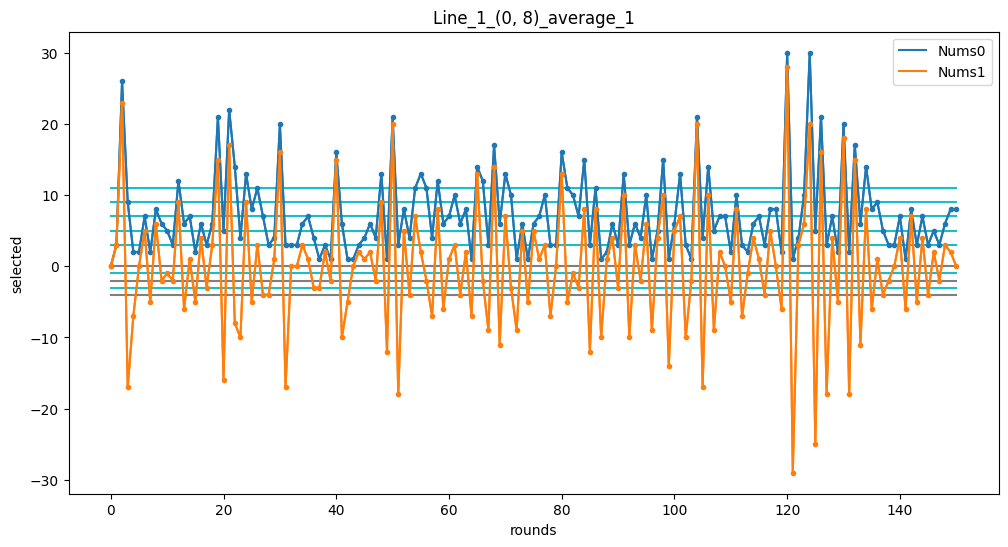

________________________________________
최소값          = [4.166666666666667, 4.333333333333333, 4.416666666666667, 4.5, 4.75, 4.833333333333333, 4.916666666666667, 5.166666666666667, 5.25, 5.333333333333333, 5.416666666666667, 5.5, 5.583333333333333, 5.666666666666667, 5.75, 5.833333333333333, 5.916666666666667, 6.0, 6.083333333333333, 6.166666666666667]
최대값          = [8.75, 8.916666666666666, 9.0, 9.083333333333334, 9.166666666666666, 9.25, 9.333333333333334, 9.5, 9.583333333333334, 9.75, 9.833333333333334, 10.0, 10.166666666666666, 10.25, 10.416666666666666, 10.583333333333334, 10.75, 11.0, 11.25, 11.416666666666666]
마지막          = [11.25, 10.166666666666666, 10.583333333333334, 11.416666666666666, 11.25, 9.5, 9.5, 8.0, 8.0, 8.0, 7.916666666666667, 6.916666666666667, 7.0, 6.166666666666667, 5.916666666666667, 5.166666666666667, 4.75, 4.5, 4.75, 5.166666666666667]


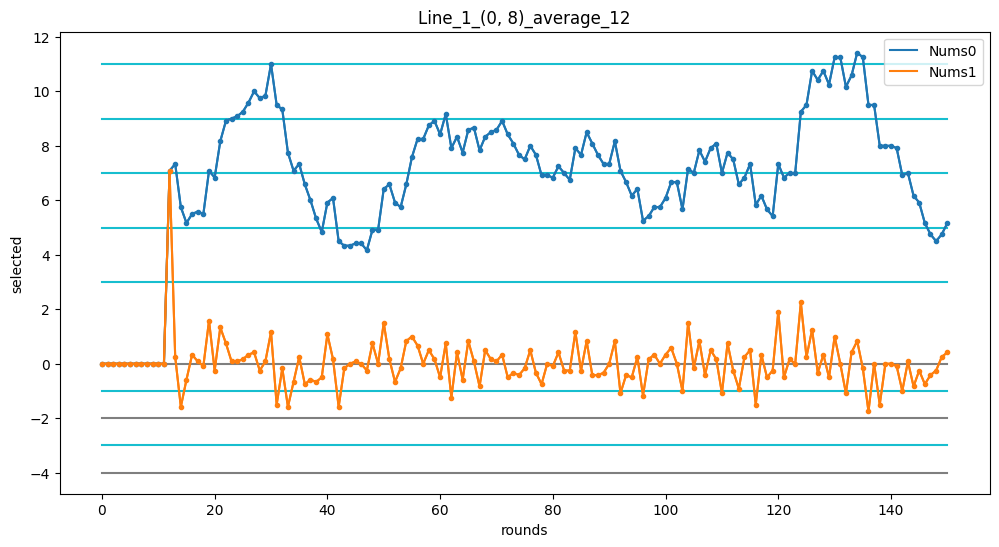

In [8]:
Round = 1
############################
selected = Round - 1
ext_data = 8

before = 0
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 12]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = True
show_before = False
show_average = True
min_max_last_num_length = 20

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length
                   )
candidate[selected] = ext_data

previous = 8


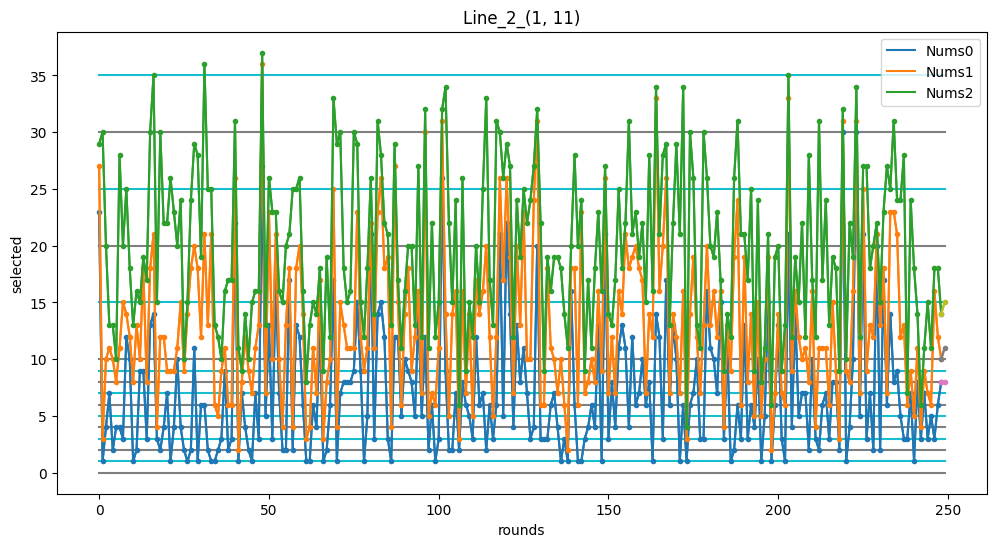

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
최대 값         = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 11
마지막 값        = 10
마지막 값들       = [21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16, 12, 10]
자주 나오는 값(부분) = [(3, 2), (15, 2), (31, 2), (23, 2), (21, 3), (18, 3), (20, 3), (4, 3), (8, 3), (5, 3), (10, 3), (19, 5), (6, 5), (11, 5), (14, 6), (13, 6), (9, 7), (12, 9), (16, 9), (7, 11)]
자주 나오는 값(전체) = [(23, 8), (20, 9), (3, 10), (19, 10), (17, 12), (5, 12), (8, 16), (4, 16), (21, 17), (13, 17), (15, 19), (16, 20), (14, 20), (12, 21), (9, 23), (18, 23), (10, 25), (6, 25), (11, 26), (7, 27)]
마지막 수의 앞과 뒤  = [[15, 10, 6], [6, 10, 6], [8, 10, 7], [7, 10, 21], [22, 10, 17], [9, 10, 12], [20, 10, 21], [11, 10, 11], [6, 10, 14], [8, 10, 9], [24, 10, 13], [3, 10, 11], [11, 10, 8], [13, 10, 18], [23, 10, 21], [21, 10, 4], [8, 10, 25], [23, 10, 10], [10, 10, 24], [11, 10, 7], [7, 10, 6], [8, 

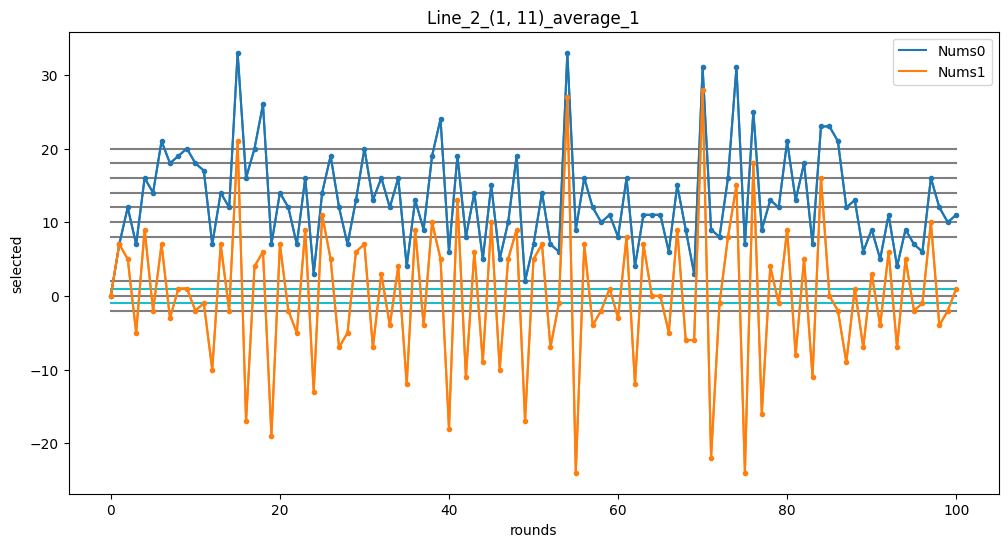

In [9]:
Round = 2
###########################
selected = Round - 1
ext_data = 11

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 20
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 8, 10, 12, 14, 16, 18, 20]
lengths = [1]
start_pos_0 = 150
start_pos_1 = 300
show_after = True
show_before = True
show_average = True
show_diff = True

before = 8
after = 15
ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=show_diff,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average
                   )
candidate[selected] = ext_data

before   = 11
ext_data = 15
after    = 28


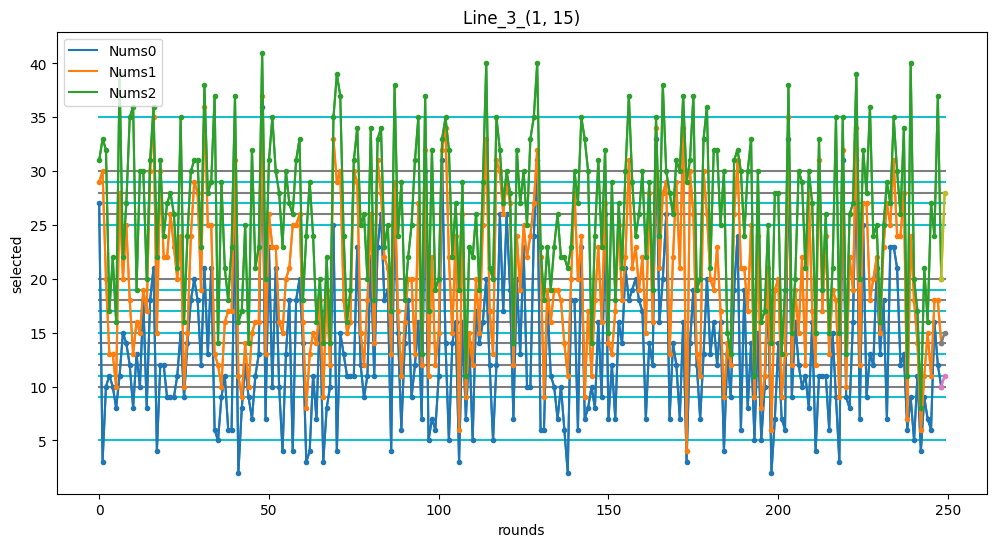

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
최대 값         = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35]
사용자 선택       = 15
마지막 값        = 14
마지막 값들       = [22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18, 18, 14]
자주 나오는 값(부분) = [(25, 3), (23, 3), (34, 3), (26, 3), (20, 3), (27, 3), (14, 4), (31, 4), (15, 4), (28, 4), (11, 4), (9, 4), (13, 5), (17, 5), (12, 5), (24, 5), (18, 6), (22, 6), (21, 6), (19, 6)]
자주 나오는 값(전체) = [(21, 12), (26, 12), (31, 12), (14, 13), (29, 13), (25, 14), (30, 14), (23, 15), (11, 15), (28, 17), (20, 17), (24, 17), (22, 18), (15, 19), (17, 19), (18, 20), (16, 21), (19, 22), (13, 24), (12, 25)]
마지막 수의 앞과 뒤  = [[31, 14, 23], [12, 14, 13], [11, 14, 32], [29, 14, 28], [16, 14, 29], [9, 14, 10], [15, 14, 18], [26, 14, 31], [18, 14, 11], [27, 14, 13], [9, 14, 12], [18, 14, 6], [18, 14, -1]]


In [20]:
Round = 3
############################
selected = Round - 1
ext_data = 15

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 20
helper_line_nums_1 = [5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 29, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 14, 16, 18, 20, 22, 24]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 12]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

start_pos_0 = 150
start_pos_1 = 300
show_after = True
show_before = True
show_average = False

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=False,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average
                   )

candidate[selected] = ext_data

before   = 15
ext_data = 28
after    = 38


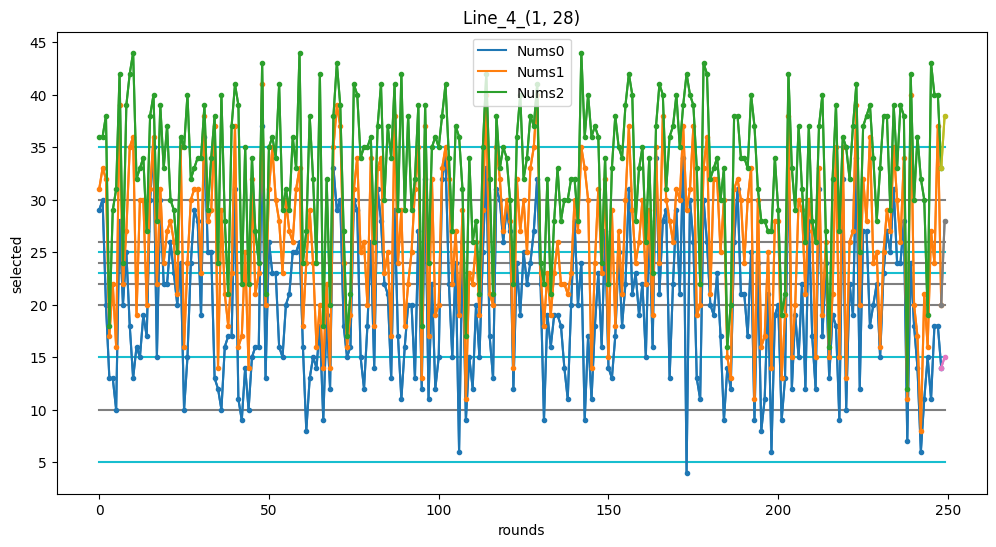

최소 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31]
최대 값         = [20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택       = 28
마지막 값        = 20
마지막 값들       = [25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24, 37, 20]
자주 나오는 값(부분) = [(11, 2), (17, 2), (31, 3), (33, 3), (13, 3), (16, 3), (37, 4), (19, 4), (35, 4), (28, 4), (32, 4), (25, 4), (27, 5), (21, 5), (24, 5), (26, 5), (20, 5), (15, 6), (29, 6), (30, 11)]
자주 나오는 값(전체) = [(37, 10), (14, 11), (18, 13), (38, 13), (20, 14), (19, 14), (25, 15), (33, 15), (28, 16), (23, 16), (24, 17), (22, 17), (21, 17), (29, 17), (27, 18), (32, 18), (31, 19), (35, 19), (26, 23), (30, 25)]
마지막 수의 앞과 뒤  = [[25, 20, 16], [34, 20, 38], [38, 20, 15], [30, 20, 31], [41, 20, 31], [16, 20, 14], [26, 20, 34], [19, 20, 33], [21, 20, 35], [19, 20, 33], [15, 20, 30], [39, 20, 32], [40, 20, 17], [37, 20, -1]]


In [19]:
Round = 4
################################
selected = Round - 1
ext_data = 28

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 20
helper_line_nums_1 = [5, 10, 15, 20, 22, 23, 24, 25, 26, 30, 35]
helper_line_nums_2 = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 22, 24, 26, 28, 30, 32]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

start_pos_0 = 150
start_pos_1 = 300
show_after = True
show_before = True
show_average = False

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=False,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average
                   )

candidate[selected] = ext_data

In [12]:
print(num_data)

[17, 24, 25, 20, 16, 19, 12, 27, 31, 25, 35, 19, 26, 36, 32, 22, 34, 12, 37, 18, 26, 26, 18, 31, 25, 32, 17, 21, 21, 14, 35, 38, 26, 29, 13, 28, 38, 30, 24, 24, 26, 29, 31, 25, 29, 29, 35, 18, 19, 26, 39, 35, 28, 14, 30, 33, 12, 28, 30, 36, 33, 15, 33, 41, 28, 22, 29, 28, 26, 30, 26, 32, 19, 41, 28, 38, 38, 25, 21, 40, 35, 13, 32, 34, 22, 41, 27, 32, 26, 32, 13, 23, 34, 26, 22, 16, 14, 23, 26, 43, 33, 28, 27, 37, 27, 31, 38, 18, 31, 18, 23, 40, 38, 26, 22, 35, 21, 18, 23, 24, 21, 26, 27, 28, 38, 22, 30, 27, 14, 21, 21, 33, 13, 32, 24, 31, 18, 33, 22, 17, 23, 42, 34, 20, 38, 20, 15, 38, 25, 36, 31, 33, 32, 17, 22, 16, 39, 22, 27, 35, 36, 19, 30, 30, 20, 31, 36, 22, 31, 24, 27, 28, 26, 21, 35, 16, 24, 30, 31, 31, 23, 38, 28, 29, 37, 14, 29, 21, 18, 23, 37, 16, 17, 25, 14, 32, 21, 23, 41, 20, 31, 35, 30, 28, 23, 30, 27, 26, 31, 33, 18, 24, 29, 24, 16, 20, 14, 22, 14, 35, 39, 37, 24, 16, 19, 31, 34, 25, 26, 20, 34, 18, 33, 34, 23, 25, 17, 38, 24, 29, 18, 22, 25, 31, 35, 13, 37, 17, 32, 19,

before   = 28
ext_data = 38
after    = 42


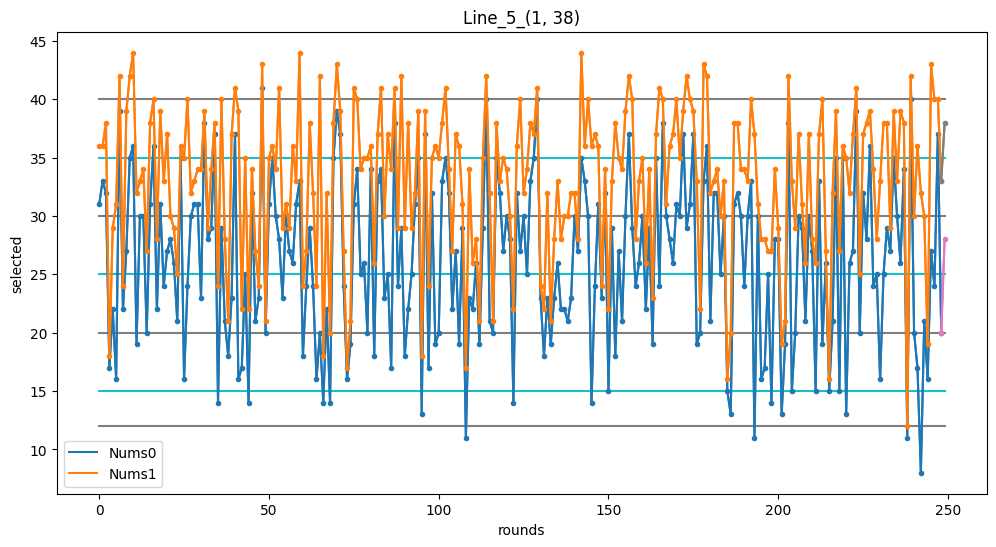

최소 값         = [12, 16, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
최대 값         = [23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
사용자 선택       = 38
마지막 값        = 33
마지막 값들       = [28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40, 40, 33]
자주 나오는 값(부분) = [(41, 2), (43, 2), (16, 2), (19, 2), (26, 3), (31, 3), (36, 3), (30, 3), (29, 3), (35, 4), (32, 4), (27, 4), (42, 5), (28, 5), (38, 7), (34, 7), (39, 7), (40, 8), (37, 8), (33, 10)]
자주 나오는 값(전체) = [(26, 9), (22, 10), (24, 12), (43, 12), (31, 13), (41, 13), (30, 14), (28, 15), (29, 16), (32, 17), (27, 18), (42, 18), (35, 19), (40, 20), (38, 22), (36, 22), (37, 23), (39, 28), (33, 29), (34, 30)]
마지막 수의 앞과 뒤  = [[30, 33, 29], [34, 33, 33], [33, 33, 33], [33, 33, 31], [26, 33, 36], [29, 33, 39], [34, 33, 40], [31, 33, 27], [25, 33, 37], [30, 33, 33], [33, 33, 28], [37, 33, 35], [27, 33, 42], [32, 33, 34], [39, 33, 37], [32, 33, 34], [36, 33, 44], [38, 33, 3

In [17]:
Round = 5
###################
selected = Round - 1
ext_data = 38

before = candidate[selected-1]
after = candidate[selected+1]
print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 20
helper_line_nums_1 = [12, 15, 20, 25, 30, 35, 40]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 28, 30, 32, 34, 36, 38]
lengths = [5, 8, 10, 13, 15, 20]
start_pos_0 = 150
start_pos_1 = 100
num_data=row_list_none_last[selected]

start_pos_0 = 150
start_pos_1 = 300
show_after = False
show_before = True
show_average = False

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average
                   )
candidate[selected] = ext_data

before   = 38
ext_data = 42
after    = 46


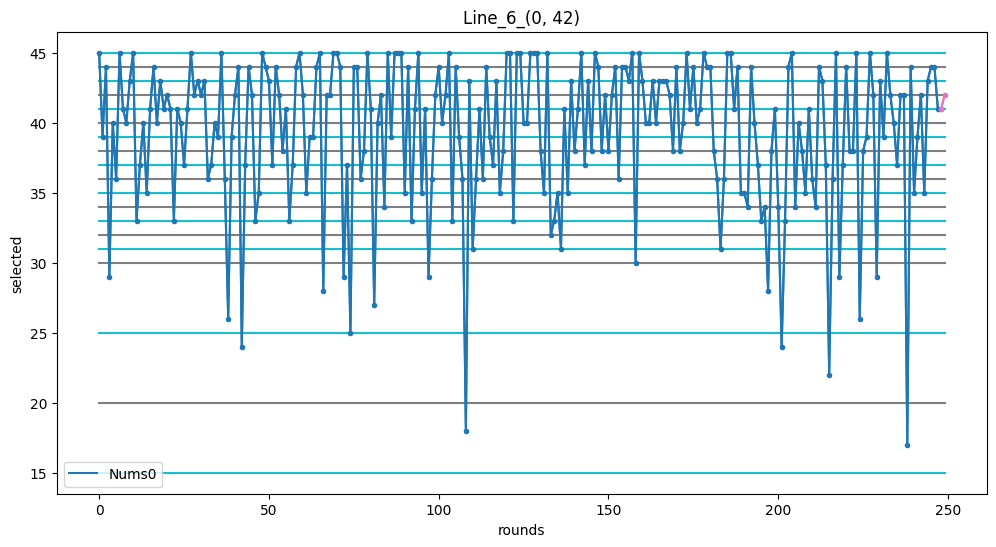

최소 값         = [17, 22, 24, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
최대 값         = [22, 24, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
사용자 선택       = 42
마지막 값        = 41
마지막 값들       = [29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44, 41, 41]
자주 나오는 값(부분) = [(31, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (33, 2), (29, 2), (39, 3), (37, 4), (36, 5), (35, 5), (34, 5), (42, 7), (41, 7), (40, 8), (38, 9), (43, 9), (45, 11), (44, 15)]
자주 나오는 값(전체) = [(26, 2), (24, 2), (30, 3), (28, 5), (32, 5), (31, 5), (29, 5), (34, 8), (33, 11), (37, 16), (35, 18), (36, 22), (40, 22), (39, 25), (41, 28), (38, 30), (42, 35), (43, 39), (44, 49), (45, 61)]
마지막 수의 앞과 뒤  = [[45, 41, 42], [38, 41, 45], [43, 41, 32], [37, 41, 42], [42, 41, 43], [43, 41, 45], [43, 41, 43], [43, 41, 44], [45, 41, 40], [35, 41, 44], [43, 41, 42], [42, 41, 33], [33, 41, 40], [37, 41, 45], [38, 41, 33], [45, 41, 27], [33, 41, 45], [35, 41, 29], [3

In [18]:
Round = 6
#################
selected = Round - 1
ext_data = 42

before = candidate[selected-1]
after = 46
print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 20
helper_line_nums_1 = [15, 20, 25, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 34, 36, 38, 40, 42]
lengths = [5, 8, 10, 13, 15, 20]
start_pos_0 = 0
start_pos_1 = 300
num_data=row_list_none_last[selected]

start_pos_0 = 150
start_pos_1 = 300
show_after = False
show_before = False
show_average = False

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average
                   )
candidate[selected] = ext_data

In [15]:
print(candidate)

{0: 8, 1: 11, 2: 15, 3: 28, 4: 30, 5: 42}


In [17]:
candidates = [[1, 3, 21, 28, 33, 40]
              ]

lasts = [
    [1, 16, 22, 23, 34, 38],
    [8, 16, 18, 19, 30, 33],
    [6, 9, 16, 19, 32, 36]
    ]

reals = [[3, 16, 18, 24, 40, 44],
         [5, 6, 11, 27, 43, 44]]

In [18]:
def draw_nums(ext_datas, is_pre_data=False, fig_size=(15, 8)):
    show_cols = [0, 1, 2, 3, 4, 5]
    show_label = False
    show_cnt = 100
    start_pos = row_length - show_cnt
    show_data = []
    for i in range(6):
        end_pos = -1 if is_pre_data else len(row_list_none_last[i])
        show_data.append(row_list_none_last[i][start_pos:end_pos])
    print(ext_datas)
    draw_scatter(show_data, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40], fig_size=fig_size)

print('current work', datetime.now())

current work 2025-07-22 18:28:17.113661


[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


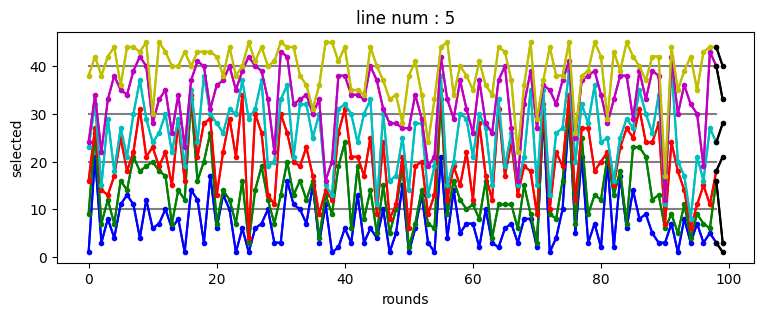

In [254]:
## My select 1180
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas=ext_datas, fig_size=(9, 3))

[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


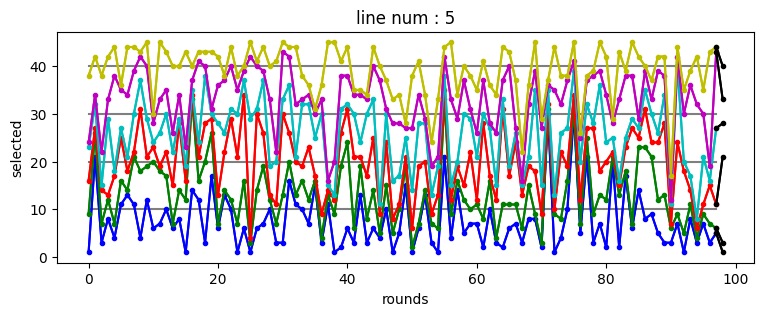

In [255]:
## My Select 1180 with 1178
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 8), (1, 16), (2, 18), (3, 19), (4, 30), (5, 33)]


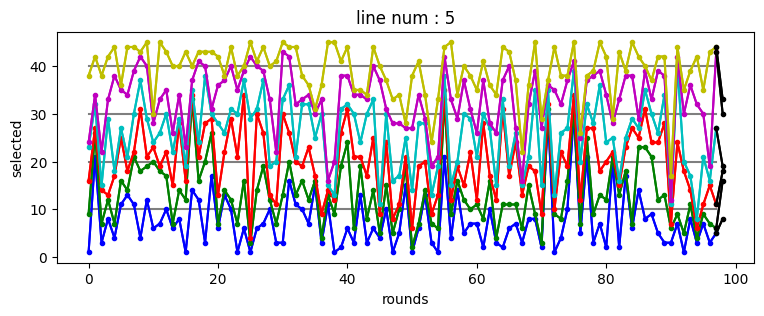

In [256]:
## My Select 1179_1 with 1178
cur_select = 1
ext_datas = [(i, lasts[cur_select][i]) for i in range(len(lasts[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 3), (1, 16), (2, 18), (3, 24), (4, 40), (5, 44)]


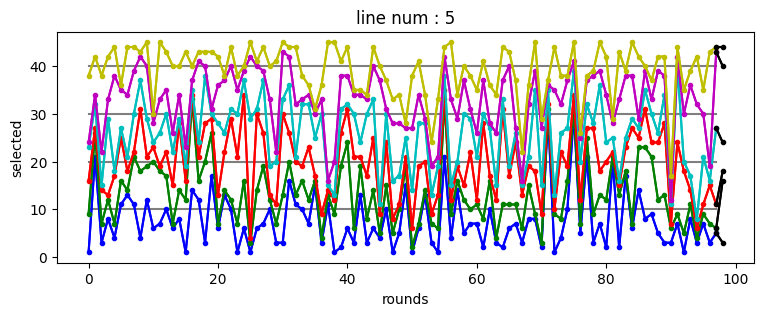

In [257]:
## real
cur_select = 0
ext_datas = [(i, reals[cur_select][i]) for i in range(len(reals[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


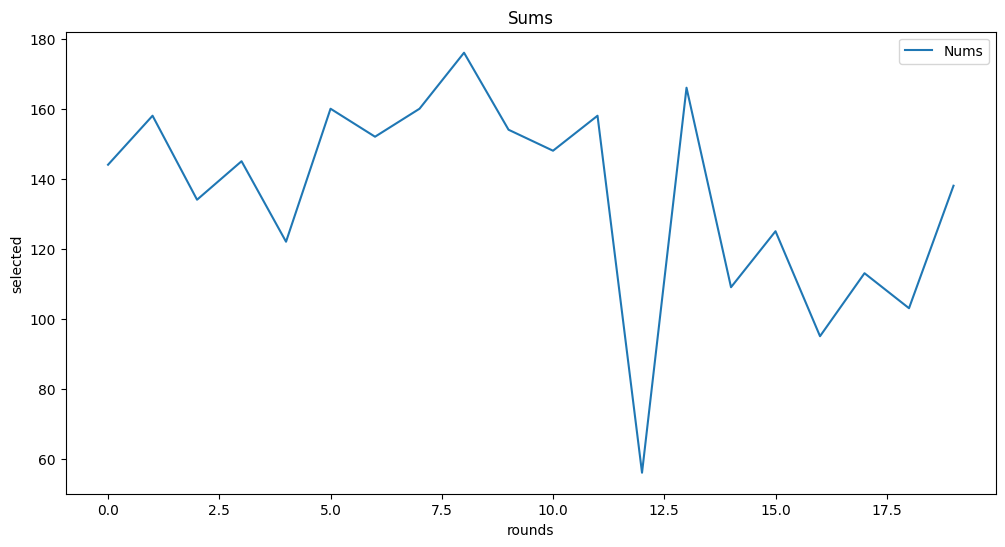

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))